<a href="https://colab.research.google.com/github/jane-rusakova/python_for_hw_tasks/blob/main/HW_11_3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

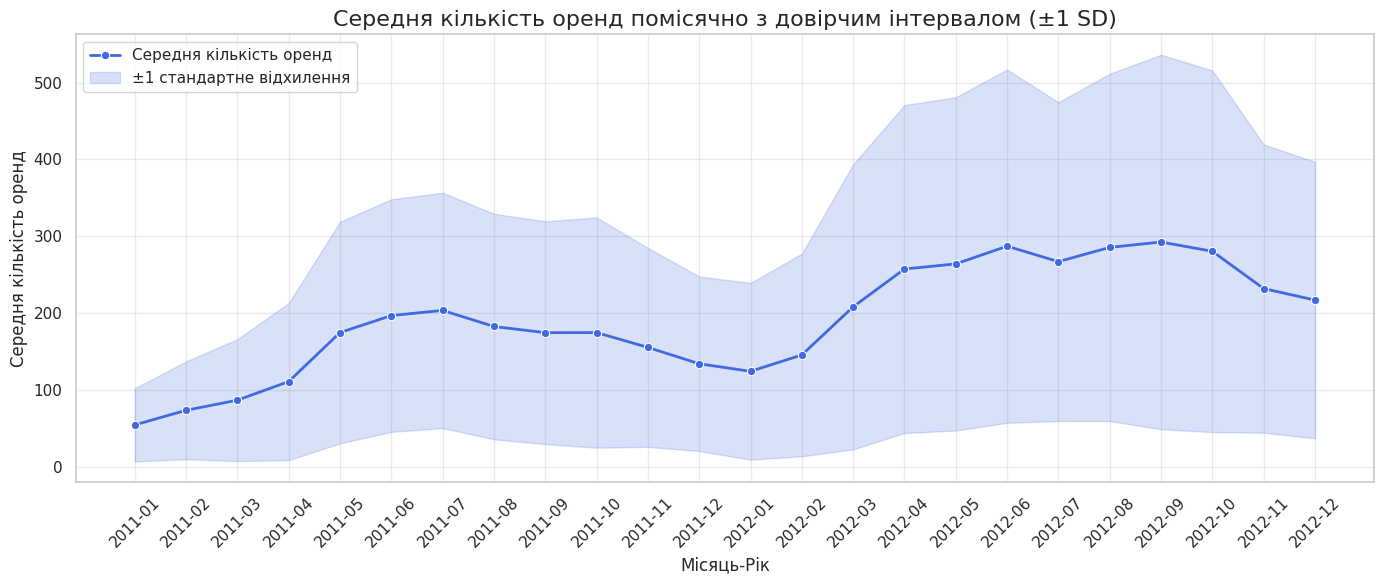

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Завантажуємо дані
df = pd.read_csv("yulu_rental.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")

# 2. Створюємо колонку month_year (місяць-рік)
df["month_year"] = df.index.to_period("M")
df["month_year"] = df["month_year"].astype(str)

# 3. Групуємо помісячно: mean + std
monthly_stats = df.groupby("month_year")["count"].agg(["mean", "std"]).reset_index()

# 4. Створюємо нижню та верхню межу довірчого інтервалу (±1 стандартне відхилення)
monthly_stats["lower"] = monthly_stats["mean"] - monthly_stats["std"]
monthly_stats["upper"] = monthly_stats["mean"] + monthly_stats["std"]

# 5. Побудова графіка
plt.figure(figsize=(14, 6))

# Основна лінія
sns.lineplot(
    data=monthly_stats,
    x="month_year",
    y="mean",
    marker="o",
    color="royalblue",
    linewidth=2,
    label="Середня кількість оренд"
)

# Довірчий інтервал (заливка між mean ± std)
plt.fill_between(
    monthly_stats["month_year"],
    monthly_stats["lower"],
    monthly_stats["upper"],
    color="royalblue",
    alpha=0.2,
    label="±1 стандартне відхилення"
)

# Оформлення
plt.title("Середня кількість оренд помісячно з довірчим інтервалом (±1 SD)", fontsize=16)
plt.xlabel("Місяць-Рік", fontsize=12)
plt.ylabel("Середня кількість оренд", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()


Найбільша невизначеність спостерігається у літні місяці — липень, серпень та вересень (7–9 місяць).
Саме в ці місяці стандартне відхилення є найбільшим.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

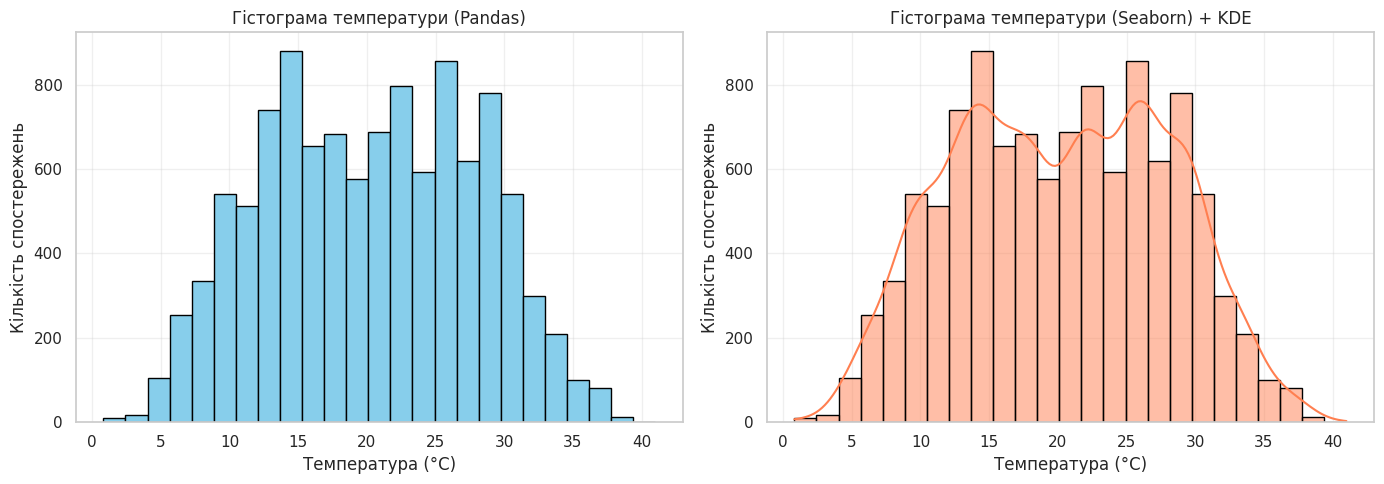

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
df = pd.read_csv("yulu_rental.csv")
df["datetime"] = pd.to_datetime(df["datetime"])

# Кількість бінів (однакова для Pandas і Seaborn)
bins = 25

# --- Створюємо фігуру 1x2 ---
plt.figure(figsize=(14, 5))

# --- Графік 1: Pandas histogram ---
plt.subplot(1, 2, 1)
df["temp"].plot.hist(
    bins=bins,
    color="skyblue",
    edgecolor="black"
)
plt.title("Гістограма температури (Pandas)")
plt.xlabel("Температура (°C)")
plt.ylabel("Кількість спостережень")
plt.grid(True, alpha=0.3)

# --- Графік 2: Seaborn histogram + KDE ---
plt.subplot(1, 2, 2)
sns.histplot(
    data=df,
    x="temp",
    bins=bins,
    kde=True,
    color="coral",
    edgecolor="black"
)
plt.title("Гістограма температури (Seaborn) + KDE")
plt.xlabel("Температура (°C)")
plt.ylabel("Кількість спостережень")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


1. В Pandas: базовий вигляд, мінімалістичний стиль; кольори і стилі простіші; немає KDE

У Seaborn: більш стильний, гармонійний зовнішній вигляд; автоматично додає відступи, більш рівні межі бінів; можна додати KDE-криву (kde=True).

2. Це плавна крива, яка показує, як розподілені дані, ніби ми “згладили” гістограму.
Вона оцінює, де значення з’являються частіше, а де — рідше, без різких переходів між біннами.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

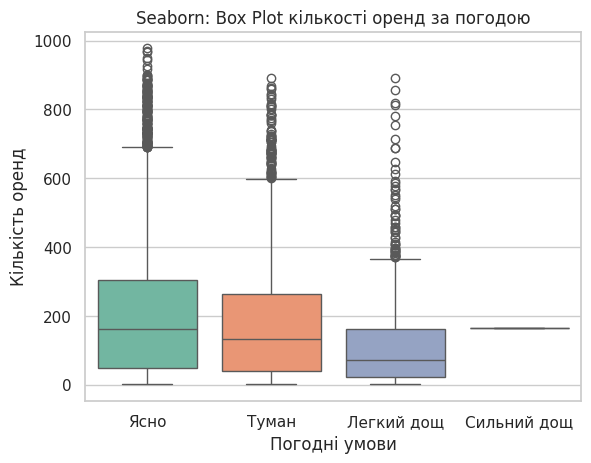

In [7]:
sns.boxplot(
    data=df,
    x="weather_name",
    y="count",
    hue="weather_name",
    palette="Set2",
    dodge=False
)

plt.title("Seaborn: Box Plot кількості оренд за погодою")
plt.xlabel("Погодні умови")
plt.ylabel("Кількість оренд")

plt.legend([], [], frameon=False)  # НЕ останній рядок
plt.show()


Seaborn створює більш привабливий, читабельний та професійний boxplot, тоді як Pandas дає лише базову, мінімалістичну версію. Порівняно з Pandas, Seaborn краще виділяє структуру розподілу, медіану, whiskers та викиди, і загалом дає кращу візуальну інтерпретацію.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


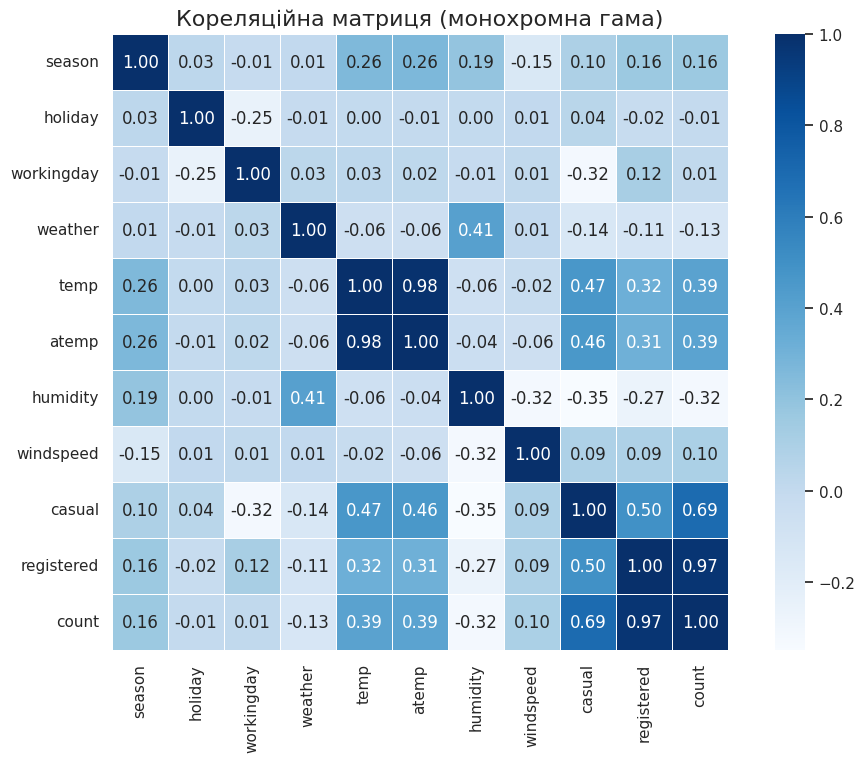

In [11]:

numeric_df = df.select_dtypes(include=["int64", "float64"])

# Кореляційна матриця
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    cmap="Blues",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True
)

plt.title("Кореляційна матриця (монохромна гама)", fontsize=16)
plt.show()


Загальна кількість оренд найсильніше залежить від кількості зареєстрованих та випадкових користувачів. Температура також позитивно впливає на число оренд. temp та atemp майже ідентичні за змістом, тому їхня кореляція майже дорівнює 1. Негативну кореляцію з кількістю оренд мають переважно погодні фактори: вологість, погані погодні умови та швидкість вітру.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


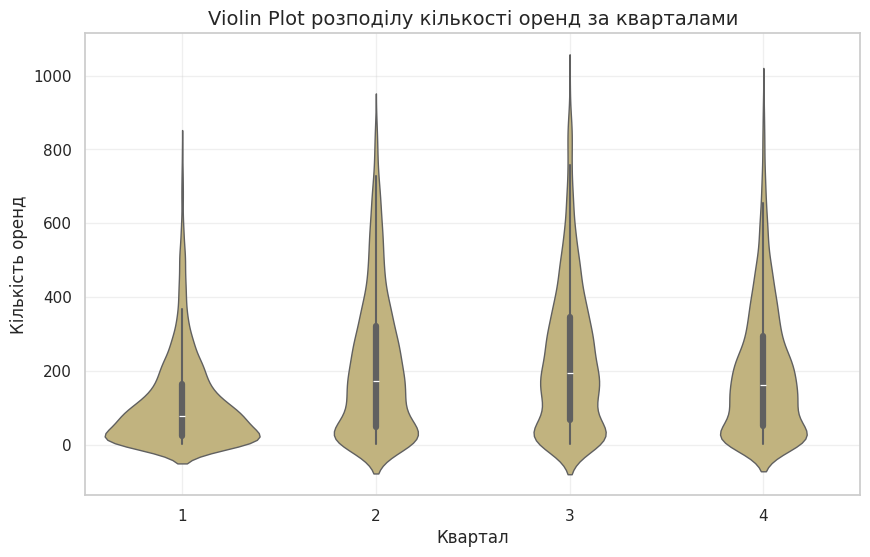

In [19]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x="season",
    y="count",
    color="y",
    linewidth=1
)

plt.title("Violin Plot розподілу кількості оренд за кварталами", fontsize=14)
plt.xlabel("Квартал")
plt.ylabel("Кількість оренд")
plt.grid(True, alpha=0.3)

plt.show()


1. Товщина violin plot показує щільність розподілу значень:

товсті ділянки - значення часто зустрічаються,
вузькі ділянки - значення зустрічаються рідко.

2. У цьому датасеті найбільша варіабельність зазвичай у Q3 (літній квартал).

3. Box plot показує лише 5 чисел:
мінімум, Q1, медіана, Q3, максимум.

Violin plot показує значно більше:
форму розподілу, щільність, піки та моди, асиметрію

Violin plot показує повну картину розподілу, а box plot — лише його ключові точки.

## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

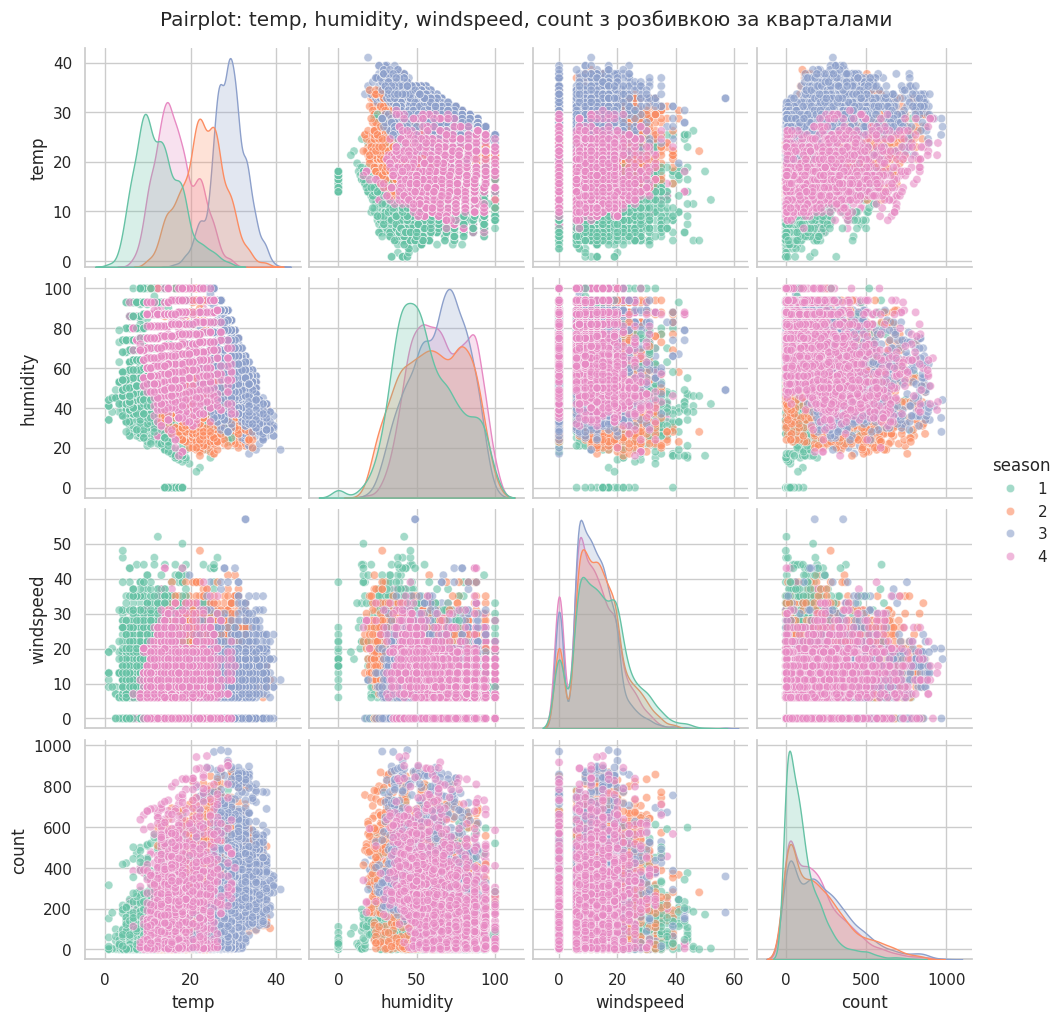

In [23]:
cols = ["temp", "humidity", "windspeed", "count", "season"]

# стиль seaborn
sns.set(style="whitegrid")

# побудова pairplot
sns.pairplot(
    df[cols],
    hue="season",
    palette="Set2",
    diag_kind="kde",        # KDE для діагональних графіків
    plot_kws={"alpha": 0.6}
)

plt.suptitle("Pairplot: temp, humidity, windspeed, count з розбивкою за кварталами", y=1.02)
plt.show()


1. Найсильніший лінійний зв’язок спостерігається між температурою та кількістю оренд — тепліші дні приводять до більшої активності користувачів.

2. Найбільше між кварталами відрізняється змінна temp, оскільки кожний квартал має чітко виражений власний температурний діапазон

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

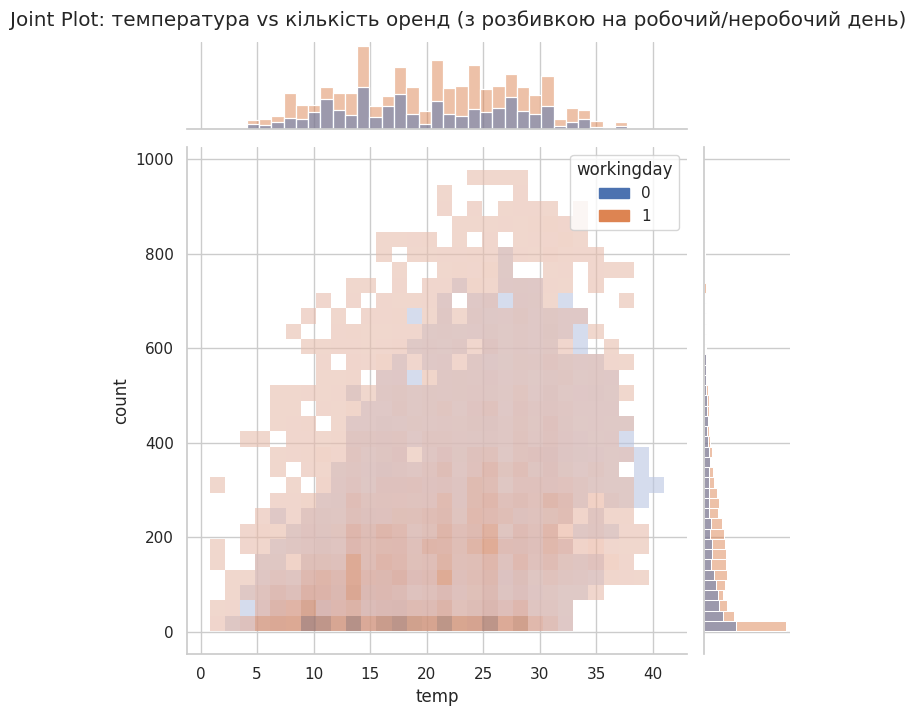

In [22]:
# робимо workingday категорією
df["workingday"] = df["workingday"].astype("category")

sns.jointplot(
    data=df,
    x="temp",
    y="count",
    hue="workingday",
    kind="hist",
    bins=30,
    height=7,
    alpha=0.6
)

plt.suptitle("Joint Plot: температура vs кількість оренд (з розбивкою на робочий/неробочий день)", y=1.02)
plt.show()


Графіки по краях jointplot показують одномірні розподіли температури та кількості оренд. З них видно, що в робочі дні кількість оренд стабільніша та вища, оскільки велосипеди активно використовуються для поїздок на роботу чи навчання. У неробочі дні розподіл значно ширший і містить більше низьких значень, що свідчить про нерегулярність попиту.